In [27]:
# Import the necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
import warnings


warnings.filterwarnings("ignore")
%matplotlib inline

* Load Dataset:

In [8]:
# Load the data
X_train = pd.read_csv("TrainImages.csv")
y_train = pd.read_csv("TrainLabel.csv")
X_test = pd.read_csv("TestImages.csv")
y_test = pd.read_csv("TestLabel.csv")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(59999, 784)
(59999, 1)
(9999, 784)
(9999, 1)


* Check for null and missing values¶


In [14]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [15]:
X_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

 There is no missing values

Ex:

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


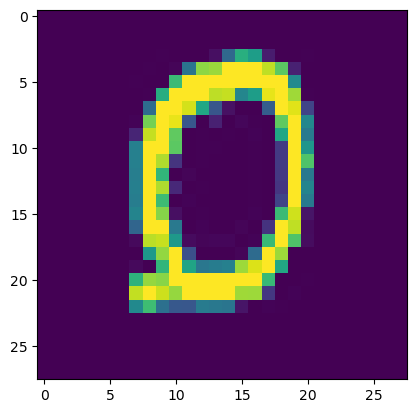

In [125]:
img_num=200   
example = plt.imshow(X_train[img_num][:,:,0])

print(y_train[img_num])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


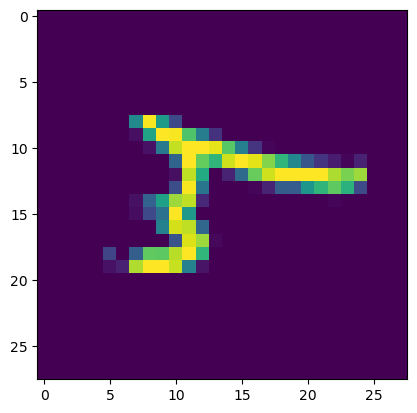

In [129]:
img_num=2   
example = plt.imshow(X_train[img_num][:,:,0])

print(y_train[img_num])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


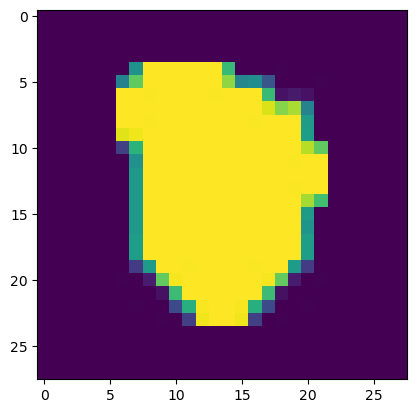

In [127]:
img_num=90   
example = plt.imshow(X_train[img_num][:,:,0])

print(y_train[img_num])

* Normalization:

In [130]:
# We normalize the dataset 
X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
print(X_train.shape)
print(y_train.shape)

(59999, 784)
(59999,)


* Reshape:

In [132]:
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

In [30]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(53999, 28, 28, 1)
(53999, 10)
(9999, 28, 28, 1)
(9999, 10)


In [23]:
# Convert to integers:
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test , num_classes = 10)

* Split training and valdiation set

In [25]:
from sklearn.model_selection import train_test_split
random_seed = 2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=random_seed)

* Baseline Model Using LR:

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_flat, np.argmax(y_train, axis=1))

LogisticRegression(max_iter=1000)

In [32]:
# Predict on the testing set
y_pred = log_reg.predict(X_test_flat)

In [33]:
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9661966196619662


* Ensemble Model using SVM, DT, RF

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

DT = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(n_estimators=100, random_state=42)
SVM = SVC(kernel='linear', random_state=42)

In [41]:
# Train the ensemble model DTree, Random Forest, SVM:
DT.fit(X_train_flat, np.argmax(y_train, axis=1))
RF.fit(X_train_flat, np.argmax(y_train, axis=1))
SVM.fit(X_train_flat, np.argmax(y_train, axis=1))

SVC(kernel='linear', random_state=42)

In [42]:
# Predict the ensemble model DTree, Random Forest, SVM:
y_pred_DT = DT.predict(X_test_flat)
y_pred_RF = RF.predict(X_test_flat)
y_pred_SVM = SVM.predict(X_test_flat)

In [44]:
# Calculate the accuracy of the model
acc_DT = accuracy_score(np.argmax(y_test, axis=1), y_pred_DT)
acc_RF = accuracy_score(np.argmax(y_test, axis=1), y_pred_RF)
acc_SVM = accuracy_score(np.argmax(y_test, axis=1), y_pred_SVM)
print("The accuracy of the Decision Tree Model:", acc_DT)
print("The accuracy of the Random Forest Model:", acc_RF)
print("The accuracy of the Support Vector Machine:", acc_SVM)


The accuracy of the Decision Tree Model: 0.9283928392839284
The accuracy of the Random Forest Model: 0.983998399839984
The accuracy of the Support Vector Machine: 0.9720972097209721


In [45]:
# Comparing between the models using Majority:
# Combine predictions using voting
def majority_vote(predictions):
    # Create an empty array to store the aggregated predictions
    aggregated_predictions = []
    # Iterate through each prediction
    for i in range(len(predictions[0])):
        # Create a dictionary to count the occurrences of each prediction
        votes = {}
        # Iterate through each classifier's prediction for the current instance
        for j in range(len(predictions)):
            vote = predictions[j][i]
            # Increment the count for the current prediction
            if vote in votes:
                votes[vote] += 1
            else:
                votes[vote] = 1
        # Choose the prediction with the highest count
        majority_vote = max(votes, key=votes.get)
        # Add the majority vote to the aggregated predictions
        aggregated_predictions.append(majority_vote)
    return aggregated_predictions

# Aggregate predictions
aggregated_predictions = majority_vote([y_pred_DT, y_pred_RF, y_pred_SVM])

In [50]:
# Evaluate the ensemble's performance
acc_ensemble = accuracy_score(np.argmax(y_test, axis=1), aggregated_predictions)
print("The Accuracy of the Ensemble Model:", acc_ensemble)

The Accuracy of the Ensemble Model: 0.97999799979998


The Accuracy of the Baseline Model: **96.61%**

The Accuracy of the Ensemble Model: **97.99%**

**Build a Neural Network Model**

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization

In [54]:
model = Sequential(
    [
        Dense(128, activation='relu', input_shape=(28,28,1)),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        Flatten(),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ]
)

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 28, 28, 128)         │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 28, 28, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │       1,605,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,615,402 (6.16 MB)

 Trainable params: 1,614,954 (6.16 MB)

 Non-trainable params: 448 (1.75 KB)

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
history = model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_val,y_val), verbose=2)

Epoch 1/10
3375/3375 - 251s - 74ms/step - accuracy: 0.9792 - loss: 0.0679 - val_accuracy: 0.9418 - val_loss: 0.4181
Epoch 2/10
3375/3375 - 258s - 76ms/step - accuracy: 0.9840 - loss: 0.0523 - val_accuracy: 0.9805 - val_loss: 0.0639
Epoch 3/10
3375/3375 - 257s - 76ms/step - accuracy: 0.9842 - loss: 0.0512 - val_accuracy: 0.9853 - val_loss: 0.0471
Epoch 4/10
3375/3375 - 255s - 75ms/step - accuracy: 0.9889 - loss: 0.0374 - val_accuracy: 0.8958 - val_loss: 1.3666
Epoch 5/10
3375/3375 - 249s - 74ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9315 - val_loss: 0.2977
Epoch 6/10
3375/3375 - 242s - 72ms/step - accuracy: 0.9901 - loss: 0.0320 - val_accuracy: 0.9735 - val_loss: 0.2376
Epoch 7/10
3375/3375 - 241s - 71ms/step - accuracy: 0.9900 - loss: 0.0308 - val_accuracy: 0.9780 - val_loss: 0.0848
Epoch 8/10
3375/3375 - 245s - 73ms/step - accuracy: 0.9905 - loss: 0.0300 - val_accuracy: 0.9768 - val_loss: 0.0953
Epoch 9/10
3375/3375 - 243s - 72ms/step - accuracy: 0.9919 - loss: 0.025

**As we see here, there is Overfitting between Accuracy and Validation Accuracy**

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


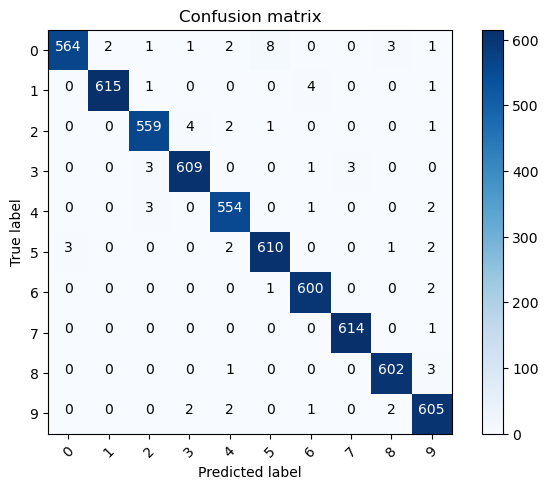

In [134]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_val,axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

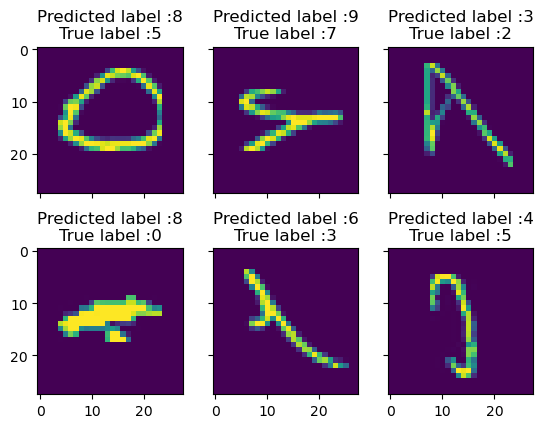

In [143]:
# Show some wrong results, and the difference between the predicted label and the real labe
# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = y_pred[errors]
Y_true_errors = y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-15:]

display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)


In [148]:
# Evaluate the model
score = model.evaluate(X_test , y_test,verbose=3)

print('The Test Accuracy of the model: %2f%%' % round((score[1] * 100),5))

The Test Accuracy of the model: 10.001000%


In [157]:
# Evaluate model
score = model.evaluate(X_test , y_test,verbose=3)

print('Test accuarcy:',score)

Test accuarcy: [5.356637001037598, 0.10001000016927719]


In [162]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Data_Augmentation = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10, 
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False)


Data_Augmentation.fit(X_train)

In [ ]:
from keras.layers import Conv2D, MaxPool2D

CNN_Model = Sequential(
    [
        Conv2D(64, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(5,5), activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2), strides=(2,2)),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation = "relu"),
        BatchNormalization(),
        Dropout(0.25),

        Dense(10, activation='softmax')
    ]
)

In [171]:
CNN_Model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 20, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 20, 20, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,746,890 (6.66 MB)

 Trainable params: 1,746,122 (6.66 MB)

 Non-trainable params: 768 (3.00 KB)

In [175]:
# Compile the CNN Model:
CNN_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
CNN = CNN_Model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_val,y_val), verbose=2)

In [64]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

In [78]:
model_pca = Sequential([
    Dense(128, activation='relu', input_shape=(50,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [79]:
# Compile the PCA model:
model_pca.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
# Fit the PCA model:
model_pca.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9025 - loss: 0.3909 - val_accuracy: 0.9778 - val_loss: 0.0820
Epoch 2/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9850 - loss: 0.0531 - val_accuracy: 0.9843 - val_loss: 0.0607
Epoch 3/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9899 - loss: 0.0351 - val_accuracy: 0.9848 - val_loss: 0.0546
Epoch 4/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9918 - loss: 0.0260 - val_accuracy: 0.9870 - val_loss: 0.0484
Epoch 5/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9941 - loss: 0.0190 - val_accuracy: 0.9857 - val_loss: 0.0541
Epoch 6/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.9867 - val_loss: 0.0518
Epoch 7/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9956 - loss: 0.0145 - val_accuracy: 0.9885 - val_loss: 0.0482
Epoch 8/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9963 - loss: 0.0127 - 

In [74]:
# Evaluate the PCA model:
accuracy_pca = model_pca.evaluate(X_test_pca, y_test, verbose=0)[1]
print("The Accuracy with PCA-transformed data:", accuracy_pca)

The Accuracy with PCA-transformed data: 0.9811981320381165


In [82]:
from sklearn.manifold import TSNE

In [83]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_flat)

- The result above is before using Data Augmentation, so let's do some tranformations on the images to improve the performance